<a href="https://colab.research.google.com/github/Layana7592/Machine_Learning_Projects/blob/main/advertising_sales_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales Prediction Using Linear Regression on Advertising Data**

Importing Libraries and Reading the Advertising Dataset

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [39]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Initial Data Exploration: Head, Tail, Missing Values, and Data Types

In [40]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [41]:
df.isna().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [42]:
df.dtypes

,0
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


Separating Features (X) and Target Variable (Y)

In [43]:
x=df.iloc[:,:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [44]:
y=df.iloc[:,-1]
y

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9
...,...
195,7.6
196,14.0
197,14.8
198,25.5


Regression Analysis of TV, Radio, and Newspaper Advertising

<Axes: xlabel='TV', ylabel='Sales'>

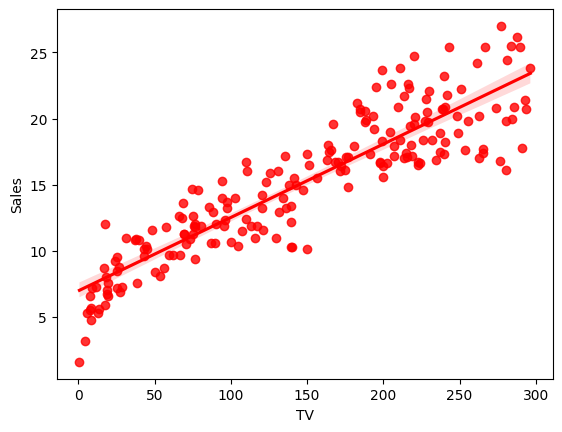

In [45]:
sns.regplot(x=df['TV'],y=y,color='r')

<Axes: xlabel='Radio', ylabel='Sales'>

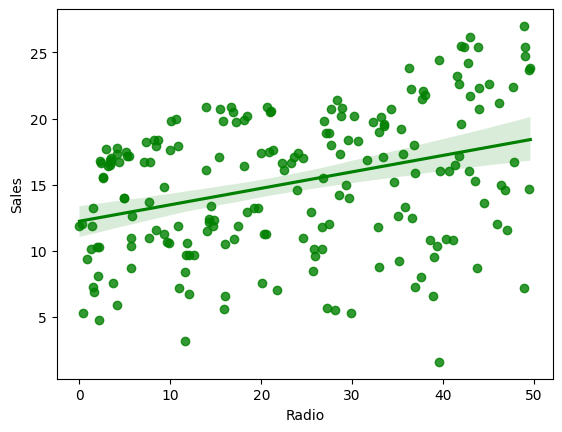

In [46]:
sns.regplot(x=df['Radio'],y=y,color='g')

<Axes: xlabel='Newspaper', ylabel='Sales'>

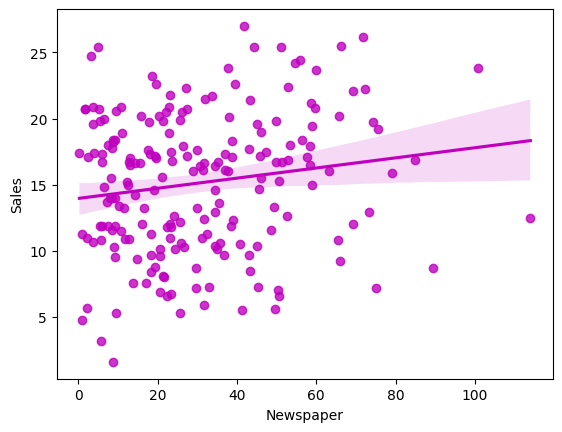

In [47]:
sns.regplot(x=df['Newspaper'],y=y,color='m')

Splitting the Dataset Into Training and Testing Sets

In [49]:
from numpy.random import RandomState
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,TV,Radio,Newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


Training the Linear Regression Model and Making Predictions

In [50]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([17.15991908, 20.53369503, 23.68914396,  9.5191455 , 21.60736836,
       12.78101318, 21.08636345,  8.76054246, 17.11499951, 16.68789636,
        8.97584663,  8.57645026, 18.33212325,  8.17863567, 12.64605571,
       14.94486946,  8.34939536, 17.83858948, 11.12172174, 20.37740648,
       20.9483297 , 13.04035779, 11.01360656, 22.51142595,  9.40369784,
        7.98591291, 20.86943368, 13.77882255, 10.83407064,  8.00419229,
       15.88597618, 10.7027424 , 20.9521718 , 10.84679243, 21.50720813,
       21.07347295, 12.22673775, 22.85273767, 12.57698182,  6.54597206,
       11.93411853, 15.23490068, 10.07411153,  9.52159696, 17.11786382,
        7.28032677, 10.49404864, 15.24356754, 11.20742176, 11.78392665,
       14.01472163, 14.59884572, 10.82722434,  9.55839415,  9.03749681,
       12.51183313, 10.52551021, 25.01900824,  7.99334943, 15.73916263])

Comparing Actual vs Predicted Values

In [51]:
df1=pd.DataFrame({'Actual_value ':y_test,
                  'Predicted_value ':y_pred,
                  'Difference':y_test-y_pred})
df1

,Actual_value,Predicted_value,Difference
95,16.9,17.159919,-0.259919
15,22.4,20.533695,1.866305
30,21.4,23.689144,-2.289144
158,7.3,9.519146,-2.219146
128,24.7,21.607368,3.092632
115,12.6,12.781013,-0.181013
69,22.3,21.086363,1.213637
170,8.4,8.760542,-0.360542
174,16.5,17.115000,-0.615000
45,16.1,16.687896,-0.587896


Importing Evaluation Metrics for Model Performance

In [52]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score


Calculating Regression Performance Metrics

In [53]:
print("MAE is :",mean_absolute_error(y_test,y_pred))

MAE is : 1.1594875061090582


In [54]:
print("MAPE is :",mean_absolute_percentage_error(y_test,y_pred))

MAPE is : 0.10536440823029307


In [55]:
print("MSE is :",mean_squared_error(y_test,y_pred))

MSE is : 2.541624036229147


In [56]:
print("RMSE is :",root_mean_squared_error(y_test,y_pred))

RMSE is : 1.5942471691143587


In [57]:
print("r2 Score is :",r2_score(y_test,y_pred))

r2 Score is : 0.9091484341849799


Predicting Sales for New Input Data

In [58]:
print(model.predict([[210,57,80]]))

[22.48621106]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Displaying Slopes and Corresponding Features

In [59]:
print(list(zip(x, map(float, model.coef_))))

[('TV', 0.05358869132706914), ('Radio', 0.10270676778771287), ('Newspaper', 0.007931667677316324)]


Intercept (Constant) of the Linear Regression Model

In [61]:
print("Constant is :",model.intercept_)

Constant is : 4.743766701589685
